**PREDVIĐANJE CIJENA DIONICA NETFLIXA KORIŠTENJEM STROJNOG UČENJA**

Predviđanje cijena dionica je način utvrđivanja buduće vrijednosti dionica poduzeća ili nekog drugog financijskog instrumenta kojim se trguje na burzi. Ovim programom pokušavamo predvidjeti cijenu dionica Netflixa pomoću strojnog učenja i Pythona. 




Prvo učitamo biblioteke potrebne za rad:

*   numpy se koristi za nizove u Pythonu. 
*   pandas koristimo za učitavanje datoteka raznih formata i za analizu podataka. 
*   sklearn.tree se koristi za predviđanje vrijednosti varijable učenjem jednostavnih pravila odlučivanja zaključenih iz značajki podataka
*   sklearn.linear_model se koristi za minimiziranje razlike između promatranog cilja u skupu podataka i cilja predviđenog linearnom aproksimacijom
*   sklearn.model_selection nudi razne značajke za obradu podataka koje se mogu koristiti za klasifikaciju, grupiranje i odabir modela
*   matplotlib.pyplot je korištena za vizualizacije

 

In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

Učitamo datoteku i spremimo je u varijablu df. Ispišemo prvih 6 redova.

In [3]:
from google.colab import files 
uploaded = files.upload() 

Saving NFLX.csv to NFLX.csv


In [21]:
df = pd.read_csv('NFLX.csv')
df.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-16,119.800003,123.000000,118.089996,122.639999,122.639999,13181000
1,2015-12-17,123.970001,126.349998,122.419998,122.510002,122.510002,17284900
2,2015-12-18,120.849998,122.190002,117.919998,118.019997,118.019997,17948100
3,2015-12-21,119.510002,119.589996,115.660004,116.629997,116.629997,11670000
4,2015-12-22,117.300003,117.430000,114.860001,116.239998,116.239998,9689000
5,2015-12-23,116.910004,118.559998,115.779999,118.160004,118.160004,9324300


Nacrtamo graf u kojem vidimo kretanje cijena dionice u USD po danima.

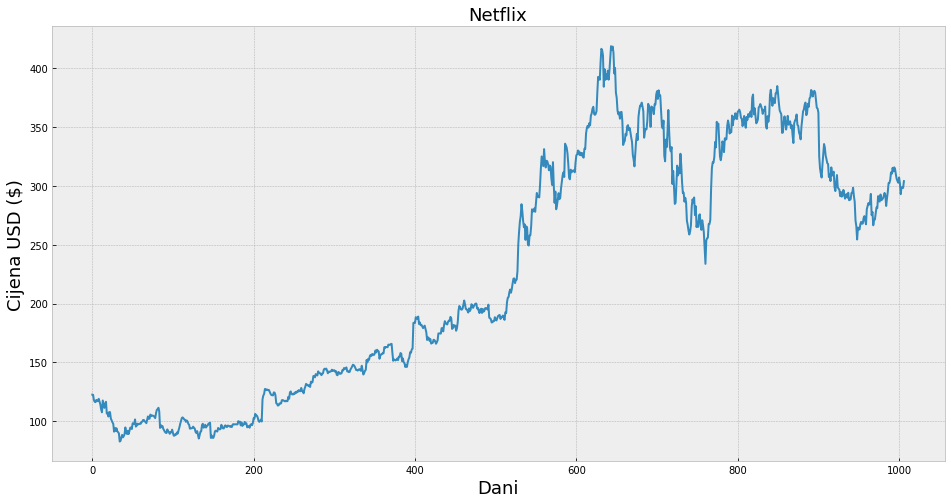

In [9]:
plt.figure(figsize=(16,8))
plt.title('Netflix', fontsize = 18)
plt.xlabel('Dani', fontsize= 18)
plt.ylabel('Cijena USD ($)', fontsize = 18)
plt.plot(df['Close'])
plt.show()

In [10]:
df = df[['Close']]
df.head(4)

,Close
0,122.639999
1,122.510002
2,118.019997
3,116.629997


Stvorimo varijablu za predviđanje x dana u budućnost. Zatim stvorimo novi stupac za pohranu ciljne varijable što je zapravo završna cijena pomaknuta x dana naprijed. Zatim ispišite zadnja 4 retka podataka.

In [11]:
future_days = 25
df['Prediction'] = df[['Close']].shift(-future_days)
df.tail(4)

,Close,Prediction
1003,298.929993,NaN
1004,298.440002,NaN
1005,298.500000,NaN
1006,304.209991,NaN


In [12]:
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[122.639999]
 [122.510002]
 [118.019997]
 [116.629997]
 [116.239998]
 [118.160004]
 [117.330002]
 [117.110001]
 [119.120003]
 [116.709999]
 [114.379997]
 [109.959999]
 [107.660004]
 [117.68    ]
 [114.559998]
 [111.389999]
 [114.970001]
 [116.580002]
 [106.559998]
 [107.059998]
 [104.040001]
 [107.889999]
 [107.739998]
 [102.349998]
 [100.720001]
 [ 99.120003]
 [ 97.830002]
 [ 91.150002]
 [ 94.410004]
 [ 91.839996]
 [ 94.089996]
 [ 91.489998]
 [ 90.739998]
 [ 89.709999]
 [ 82.790001]
 [ 83.32    ]
 [ 86.129997]
 [ 88.449997]
 [ 86.349998]
 [ 87.400002]
 [ 89.050003]
 [ 94.760002]
 [ 90.489998]
 [ 89.230003]
 [ 91.93    ]
 [ 89.120003]
 [ 91.610001]
 [ 94.529999]
 [ 94.790001]
 [ 93.410004]
 [ 98.300003]
 [ 97.610001]
 [ 97.93    ]
 [101.580002]
 [ 95.489998]
 [ 96.230003]
 [ 98.      ]
 [ 97.360001]
 [ 97.660004]
 [ 98.129997]
 [ 97.860001]
 [ 99.349998]
 [ 99.720001]
 [101.120003]
 [101.059998]
 [ 99.839996]
 [ 99.589996]
 [ 98.360001]
 [101.209999]
 [104.129997]
 [102.190002]
 [102.

In [13]:
y = np.array(df['Prediction'])[:-future_days]
print(y)

[ 99.120003  97.830002  91.150002  94.410004  91.839996  94.089996
  91.489998  90.739998  89.709999  82.790001  83.32      86.129997
  88.449997  86.349998  87.400002  89.050003  94.760002  90.489998
  89.230003  91.93      89.120003  91.610001  94.529999  94.790001
  93.410004  98.300003  97.610001  97.93     101.580002  95.489998
  96.230003  98.        97.360001  97.660004  98.129997  97.860001
  99.349998  99.720001 101.120003 101.059998  99.839996  99.589996
  98.360001 101.209999 104.129997 102.190002 102.230003 105.699997
 104.349998 104.940002 104.830002 104.449997 103.809998 102.68
 106.980003 109.650002 110.419998 111.510002 108.400002  94.339996
  96.769997  94.980003  95.900002  93.559998  92.43      91.040001
  90.279999  90.029999  93.110001  91.540001  90.790001  89.370003
  90.839996  90.540001  92.889999  90.019997  87.739998  87.879997
  89.120003  88.629997  90.5       89.550003  92.489998  94.889999
  97.889999 100.199997 102.809998 103.300003 102.57     101.510002

Podijelimo podatke tako da 75% ide u skup za treniranje, a 25% u skup za testiranje.

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

Sada kreiramo model. Koristimo stabla odluke i model linearne regresije.

In [15]:
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

Uzmemo sve podatke osim zadnjih x redova te taj skup pretvorimo u red. Koristiti ćemo te podatke za testiranje modela i da bi vidjeli kakve ćemo dobiti rezultate.

In [16]:
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days) 
x_future = np.array(x_future)
x_future

array([[274.459991],
       [270.720001],
       [267.529999],
       [280.480011],
       [282.929993],
       [285.529999],
       [284.25    ],
       [286.279999],
       [293.350006],
       [275.299988],
       [278.049988],
       [266.690002],
       [271.269989],
       [271.5     ],
       [276.820007],
       [281.859985],
       [281.209991],
       [291.450012],
       [287.410004],
       [286.809998],
       [292.859985],
       [288.029999],
       [288.589996],
       [289.570007],
       [291.570007]])

Gledamo predviđanje oba modela.

In [17]:
tree_prediction = tree.predict(x_future)
print( tree_prediction )
print()
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[294.179993 255.570007 283.109985 289.619995 332.940002 302.570007
 302.600006 305.160004 280.480011 337.589996 315.549988 312.48999
 315.929993 314.660004 309.98999  306.160004 285.769989 302.859985
 307.350006 302.5      280.480011 298.440002 298.440002 298.5
 271.269989]

[276.06136806 272.5185649  269.49675223 281.76398915 284.08479855
 286.54772211 285.33520964 287.25817919 293.95542787 276.85707714
 279.46208643 268.70104315 273.03955539 273.25743931 278.29695482
 283.07120554 282.45548176 292.15560896 288.32860592 287.76023458
 293.49124269 288.91591237 289.44638415 290.37472515 292.26927736]


Vizualiziramo predviđene podatke modelom stabla i usporedimo ih sa stvarnim podatcima.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


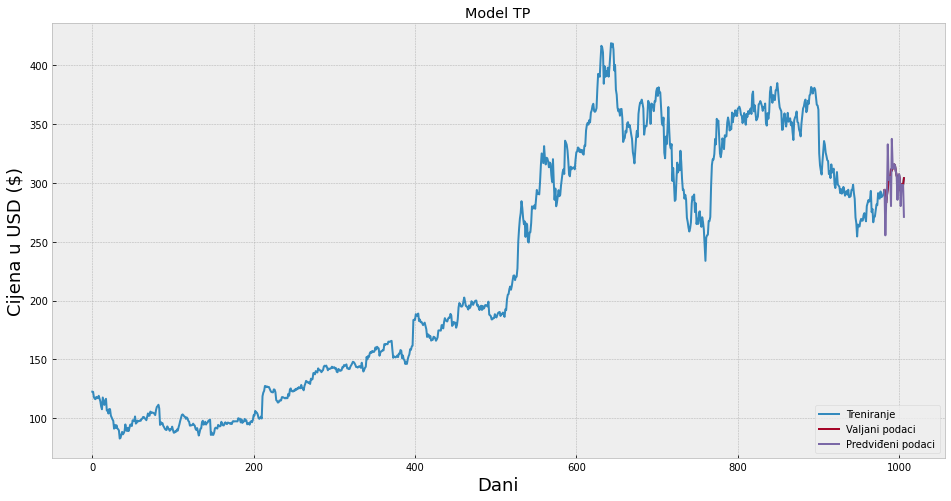

In [18]:
predictions = tree_prediction
valid =  df[X.shape[0]:]
valid['Predictions'] = predictions 
plt.figure(figsize=(16,8))
plt.title('Model TP')
plt.xlabel('Dani',fontsize=18)
plt.ylabel('Cijena u USD ($)',fontsize=18)
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Treniranje', 'Valjani podaci', 'Predviđeni podaci' ], loc='lower right')
plt.show()

Vizualiziramo previđene podatke modelom linearne regresije i usporedimo ih sa stvarnim podacima.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


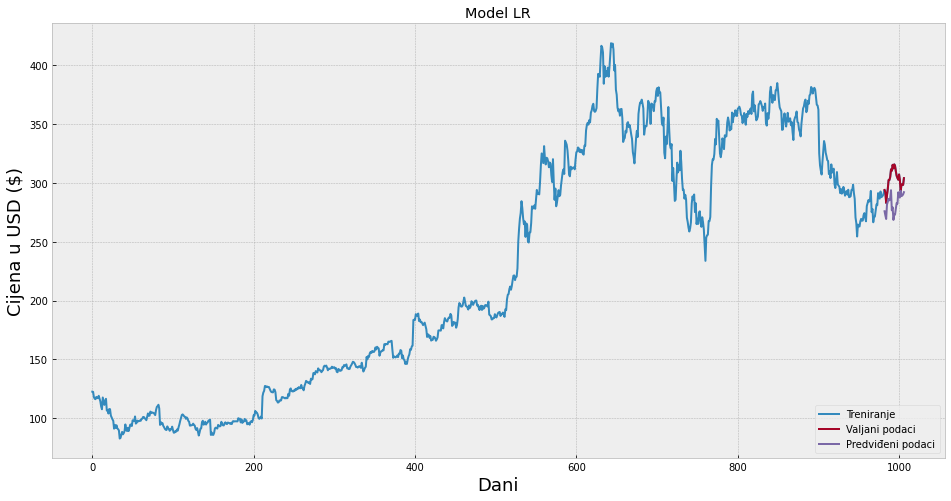

In [19]:
predictions = lr_prediction
valid =  df[X.shape[0]:]
valid['Predictions'] = predictions 
plt.figure(figsize=(16,8))
plt.title('Model LR')
plt.xlabel('Dani',fontsize=18)
plt.ylabel('Cijena u USD ($)',fontsize=18)
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Treniranje', 'Valjani podaci', 'Predviđeni podaci' ], loc='lower right')
plt.show()

Usporedbom samo ova dva grafa i nijedne druge metrike izvedbe dolazim do zaključka da je predviđanje modelom stabla odluke dalo bolje rezultate od modela linearne regresije.
